In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, display
#import tabulate

plt.rcParams['figure.figsize'] = [20, 20]
years = [2015, 2014, 2013, 2012]
#fig, axes = plt.subplots(nrows=4, ncols=4)

for i in range(0,4):
    
    year = years[i]    
    df_dist = pd.read_pickle('../data/'+str(year)+'/MasterData_'+str(year)+'.pkl.gz')
    
    #     NTEE  IRS_URL  TEXTTYPE   :  DataFrame

    #     Yes      Yes     Yes    :   YYY
    #     Yes      Yes     No     :   YYN
    #     Yes      No      No     :   YNN
    #     No      Yes      Yes    :   NYY
    #     No      Yes      No     :   NYN
    #     No       No      No     :   NNN [Doesn't Exist in this dataset]

    #Keeping in mind that one organization may have more than one rows depending on number of tags found
    #If proportion of organizations is to be measured, drop_duplicates('EIN') must be implemeted.

    YYY = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
    YYN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    YNN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.isna()) & (df_dist.TEXTTYPE.isna())]
    NYY = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
    NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    '''
    Stats = pd.DataFrame([["NTEE"+str(year),"IRS_URL"+str(year),"TEXTTYPE"+str(year), "DataDrame"+str(year), "#Organizations"+str(year)],
             ["Yes","Yes","Yes", "YYY", len(YYY.drop_duplicates('EIN'))],
             ["Yes","Yes","No", "YYN", len(YYN.drop_duplicates('EIN'))],
             ["Yes","No","No", "YNN", len(YNN.drop_duplicates('EIN'))],
             ["No","Yes","Yes", "NYY", len(NYY.drop_duplicates('IRS_URL'))],
             ["No","Yes","No", "NYN", len(NYN.drop_duplicates('IRS_URL'))],
             ["No","No","No", "NNN", 0]], columns= ["NTEE","IRS_URL","TEXTTYPE", "DataDrame", "#Organizations"])

    #display(HTML(tabulate.tabulate(Stats, tablefmt='html')))

    #Organizations' distributions based on categories
    All_CatData = pd.concat([YYY, YYN, YNN]).drop_duplicates('EIN')
    Org_Cat = pd.DataFrame(All_CatData['NTEE'])
    Dist_Cat = Org_Cat.apply(pd.value_counts).sort_index().plot(kind='bar', ax=axes[0,i]); axes[0,i].set_title('AllNTEE'+str(year));

    #Organizations' distributions based on categories with URLs and Text
    Org_CatURL = pd.DataFrame(YYY.drop_duplicates('EIN')['NTEE'])
    Dist_CatURL = Org_CatURL.apply(pd.value_counts).sort_index().plot(kind='bar', ax=axes[1,i]); axes[1,i].set_title('YYY'+str(year));

    #Organizations' distribution based on URLs with missing Text
    #Includes those with NTEE and IRS_URL, but no Text found on sites from primary tag search.
    Cat_MissingTXT = pd.DataFrame(YYN.drop_duplicates('EIN')['NTEE'])
    Dist_CatMissingTXT = Cat_MissingTXT.apply(pd.value_counts).sort_index().plot(kind='bar', ax=axes[2,i]); axes[2,i].set_title('YYN'+str(year));

    #Organizations' distribution based on missing URLs 
    #Includes those with NTEE but no IRS_URL
    Cat_MissingURL = pd.DataFrame(YNN.drop_duplicates('EIN')['NTEE'])
    Dist_CatMissingURL = Cat_MissingURL.apply(pd.value_counts).sort_index().plot(kind='bar', ax=axes[3,i]); axes[3,i].set_title('YNN'+str(year));
    '''


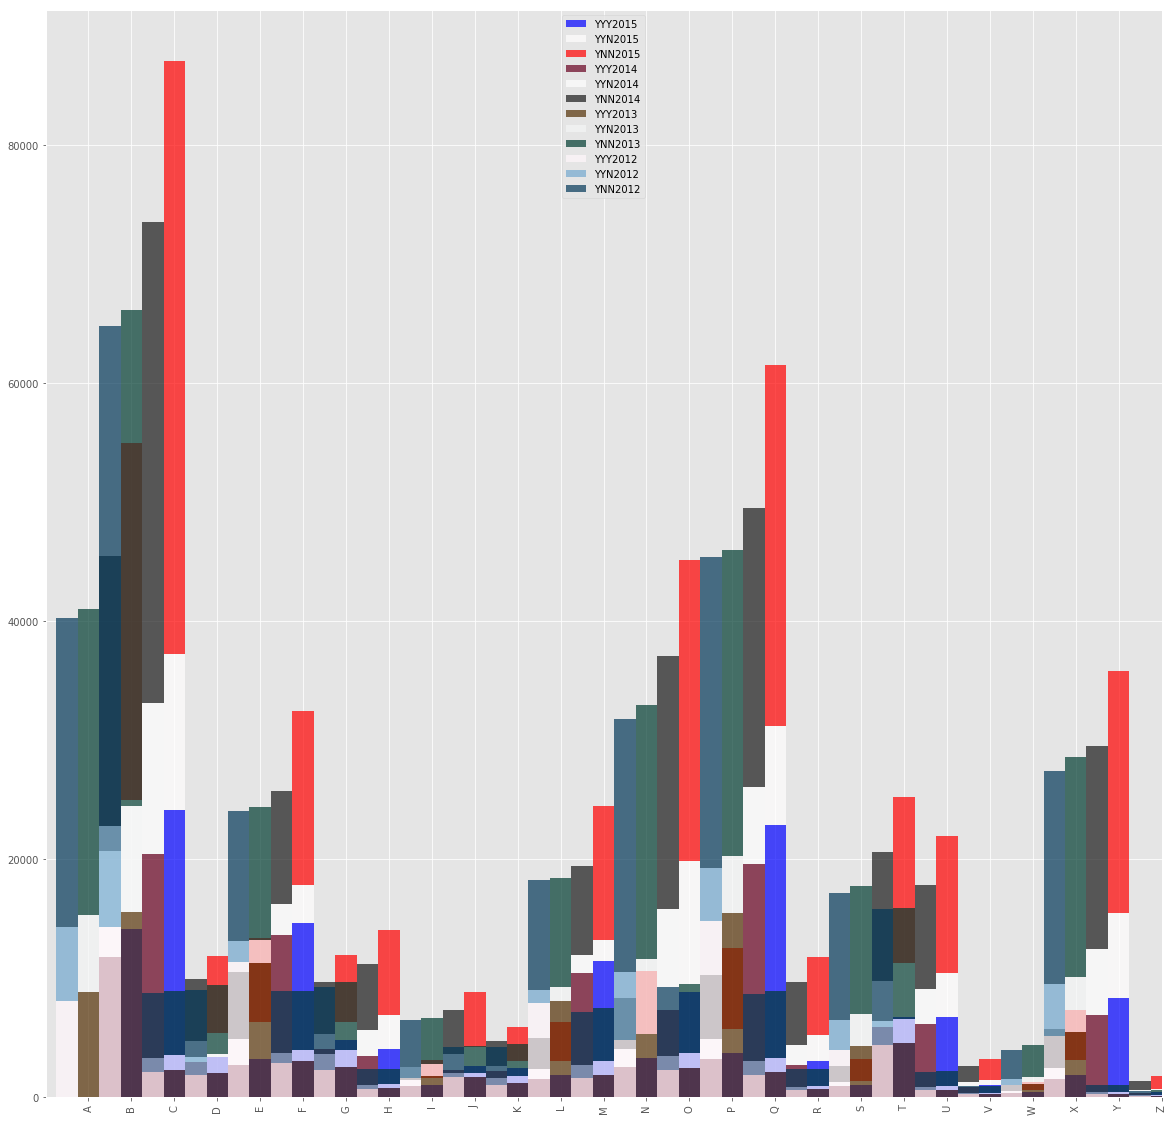

In [20]:
plt.style.use('ggplot')

years = [2015, 2014, 2013, 2012]
positions = [-1.5, -0.5, 0.5, 1.5]
colormaps = ["bwr","RdGy", "BrBG", "PuBu"]
#fig, axes = plt.subplots(nrows=4, ncols=4)
fig, ax = plt.subplots()

for i in range(0,4):
    
    year = years[i]    
    df_dist = pd.read_pickle('../data/'+str(year)+'/MasterData_'+str(year)+'.pkl.gz')
    
    #     NTEE  IRS_URL  TEXTTYPE   :  DataFrame

    #     Yes      Yes     Yes    :   YYY
    #     Yes      Yes     No     :   YYN
    #     Yes      No      No     :   YNN
    #     No      Yes      Yes    :   NYY
    #     No      Yes      No     :   NYN
    #     No       No      No     :   NNN [Doesn't Exist in this dataset]

    #Keeping in mind that one organization may have more than one rows depending on number of tags found
    #If proportion of organizations is to be measured, drop_duplicates('EIN') must be implemeted.

    YYY = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
    YYN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    YNN = df_dist[(df_dist.NTEE.notna()) & (df_dist.IRS_URL.isna()) & (df_dist.TEXTTYPE.isna())]
    NYY = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.notna())]
    NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    NYN = df_dist[(df_dist.NTEE.isna()) & (df_dist.IRS_URL.notna()) & (df_dist.TEXTTYPE.isna())]
    
    total_URL = len(df_dist[df_dist.IRS_URL.notna()].drop_duplicates('IRS_URL'))
    total_ORG = len(df_dist.drop_duplicates('EIN'))   

    Org_CatURL = pd.DataFrame(YYY.drop_duplicates('EIN')['NTEE'])  
    Dist_CatURL = Org_CatURL.apply(pd.value_counts).sort_index()
    
    Cat_MissingTXT = pd.DataFrame(YYN.drop_duplicates('EIN')['NTEE'])
    Dist_CatMissingTXT = Cat_MissingTXT.apply(pd.value_counts).sort_index()
    
    Cat_MissingURL = pd.DataFrame(YNN.drop_duplicates('EIN')['NTEE'])
    Dist_CatMissingURL = Cat_MissingURL.apply(pd.value_counts).sort_index()
    
    df = pd.DataFrame()
    df['YYY'+str(year)] = Dist_CatURL['NTEE']
    df['YYN'+str(year)] = Dist_CatMissingTXT['NTEE']
    df['YNN'+str(year)] = Dist_CatMissingURL['NTEE']
    
    df[['YYY'+str(year),'YYN'+str(year),'YNN'+str(year)]].plot.bar(stacked=True, 
                                        width=0.5, position=positions[i], colormap=colormaps[i], ax=ax, alpha=0.7)

    

plt.legend(loc="upper center")
plt.show()
#df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
#df2[['abuse','nff']].plot(kind='bar', stacked=True)